In [7]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from PIL import Image
import glob

# --- CONFIGURATION ---
DATA_OUTPUT = Path("..").resolve().parent / "data" / "05_cnn_input"
SAIN_DIR = DATA_OUTPUT / "sain"
BALOURD_DIR = DATA_OUTPUT / "balourd"

print(f"🔍 Inspection du dataset : {DATA_OUTPUT}")

🔍 Inspection du dataset : D:\college\Masi2\Q1\Projet_Integre\predictive-maintenance-ai\data\05_cnn_input


In [8]:
# 1. CHECK QUANTITY & BALANCE
# ---------------------------
sain_files = list(SAIN_DIR.glob("*.png"))
balourd_files = list(BALOURD_DIR.glob("*.png"))
n_sain = len(sain_files)
n_balourd = len(balourd_files)

print(f"\n📊 1. Répartition des classes :")
print(f"   - Sain    : {n_sain} images")
print(f"   - Balourd : {n_balourd} images")
print(f"   - TOTAL   : {n_sain + n_balourd}")

if n_sain == 0 or n_balourd == 0:
    print("   ❌ ERREUR CRITIQUE : Une des classes est vide !")
else:
    ratio = n_sain / n_balourd
    print(f"   - Ratio   : 1 Balourd pour {ratio:.2f} Sain")
    if ratio > 5 or ratio < 0.2:
        print("   ⚠️ ATTENTION : Déséquilibre de classe important.")
    else:
        print("   ✅ Balance acceptable.")


📊 1. Répartition des classes :
   - Sain    : 551 images
   - Balourd : 246 images
   - TOTAL   : 797
   - Ratio   : 1 Balourd pour 2.24 Sain
   ✅ Balance acceptable.


In [9]:
# 2. CHECK DIMENSIONS & FORMAT
# ----------------------------
# On vérifie une image au hasard pour voir si la forme est correcte
sample_img = Image.open(sain_files[0])
width, height = sample_img.size
mode = sample_img.mode

print(f"\nVm 2. Format des images :")
print(f"   - Dimensions : {width} x {height} (Largeur x Hauteur)")
print(f"   - Mode couleur : {mode}")

if width < 30:
    print("   ❌ ERREUR : Images trop étroites (problème d'overlap).")
elif mode != "RGB":
    print("   ❌ ERREUR : Les images ne sont pas en RGB.")
else:
    print("   ✅ Dimensions et format valides pour le CNN.")


Vm 2. Format des images :
   - Dimensions : 101 x 129 (Largeur x Hauteur)
   - Mode couleur : RGB
   ✅ Dimensions et format valides pour le CNN.


In [10]:
# 3. CHECK PIXEL VALUES (NO BLACK IMAGES)
# ---------------------------------------
# On teste 100 images au hasard pour vérifier qu'elles ne sont pas noires
print(f"\n3. Vérification du contenu (Echantillon)...")
all_files = sain_files + balourd_files
np.random.shuffle(all_files)
sample_files = all_files[:100] # Test sur 100 images

black_count = 0
for p in sample_files:
    img_arr = np.array(Image.open(p))
    # Si la moyenne des pixels est < 5 (presque noir complet)
    if img_arr.mean() < 5: 
        black_count += 1

if black_count > 0:
    print(f"   ⚠️ ATTENTION : {black_count}% de l'échantillon semble noir/vide.")
else:
    print("   ✅ Aucune image noire détectée dans l'échantillon.")


3. Vérification du contenu (Echantillon)...
   ✅ Aucune image noire détectée dans l'échantillon.



4. Visualisation comparative (Sain vs Balourd)...


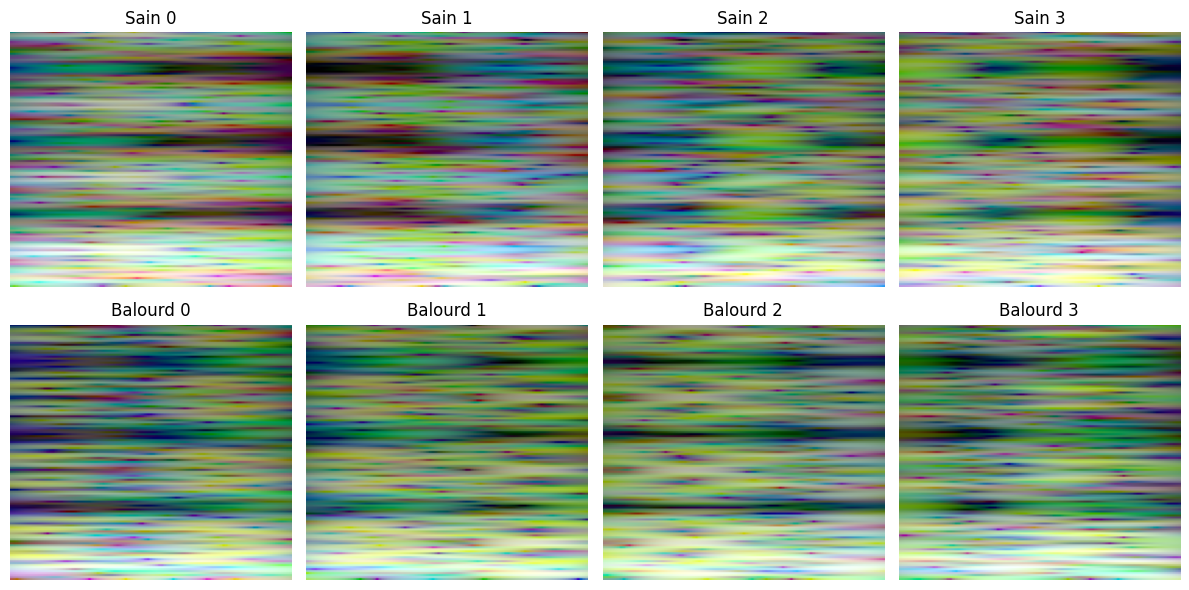

In [12]:
# 4. VISUALISATION COMPARATIVE
# ----------------------------
print(f"\n4. Visualisation comparative (Sain vs Balourd)...")
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# Ligne 1 : Sain
for i in range(4):
    if i < len(sain_files):
        img = Image.open(sain_files[i])
        axes[0, i].imshow(img, aspect='auto')
        axes[0, i].set_title(f"Sain {i}")
        axes[0, i].axis('off')

# Ligne 2 : Balourd
for i in range(4):
    if i < len(balourd_files):
        img = Image.open(balourd_files[i])
        axes[1, i].imshow(img, aspect='auto')
        axes[1, i].set_title(f"Balourd {i}")
        axes[1, i].axis('off')

plt.tight_layout()
plt.show()